<a href="https://colab.research.google.com/github/im-Seunghwan/Project/blob/main/ANOVA%EB%B0%8F%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_excel('/content/gdrive/My Drive/skb/논문용데이터.xlsx', index_col = 0)
df
df = df.rename(columns={'관객수':'box_aud'})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
test = pd.DataFrame({'방법':['A']*9 + ['B']*9 +['C']*9, 'Pre':[15, 17,18,14,19,14,16,18,21,
                                                             12,15,14,13,16,12,14,12,13,
                                                             16,17,24,15,19,15,13,15,19]})

In [ ]:
print(test[test['방법'] == 'A']['Pre'].mean())
print(test[test['방법'] == 'B']['Pre'].mean())
print(test[test['방법'] == 'C']['Pre'].mean())

16.88888888888889
13.444444444444445
17.0


            df      sum_sq    mean_sq    F    PR(>F)
C(방법)      2.0   73.555556  36.777778  6.0  0.007707
Residual  24.0  147.111111   6.129630  NaN       NaN

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -3.4444 0.0184 -6.3585 -0.5304   True
     A      C   0.1111    0.9  -2.803  3.0252  False
     B      C   3.5556 0.0148  0.6415  6.4696   True
----------------------------------------------------


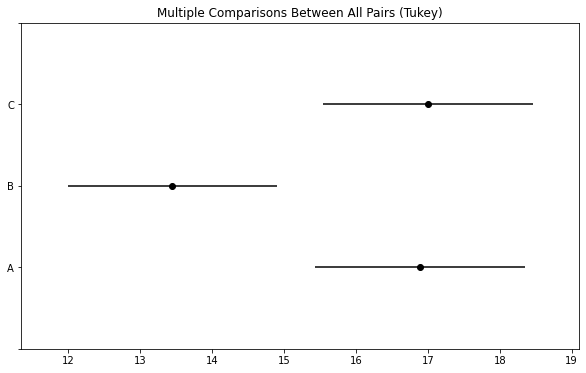

In [ ]:

# view_count

model = ols('Pre ~ C(방법)', test).fit()

print(anova_lm(model))
posthoc = pairwise_tukeyhsd(test['Pre'], test['방법'], alpha=0.05)
print()
print(posthoc)
fig = posthoc.plot_simultaneous()

In [ ]:
df.loc[11,'box_aud'] = 4647
type('444,444'.replace(',',''))

str

In [ ]:
for i in range(len(df)):
  tmp = df.loc[i,'box_aud']
  if type(tmp) == str:
    if ',' in tmp:
      df.loc[i,'box_aud'] = float(tmp.replace(',',''))

In [ ]:
df['box_aud'] = df['box_aud'].astype('float')

In [ ]:
df.rename(columns={'구간3-단품':'구간3_단품', '구간3-프리미어':'구간3_프리미어', '구간4-단품':'구간4_단품', '구간4-프리미어':'구간4_프리미어', '구간5-단품':'구간5_단품',
       '구간5-프리미어':'구간5_프리미어'},inplace=True)
df

,상품ID,개봉일,nations,genres,grade,director,actors,VOD개시일,box_aud,릴리즈전리뷰합,릴리즈후리뷰합,view_count,총매출,구간1,구간2,구간3_단품,구간3_프리미어,구간4_단품,구간4_프리미어,구간5_단품,구간5_프리미어,전체평균,분류,단품비율,프리미어비율,타이틀명,kobis_code,naver_id
0,P000026,2017-09-14,['홍콩'],"['액션', '스릴러']",15,['오품유'],"['사정봉', '유청운']",2017-09-14,59.0,6,1,1938,682900,7.208569e-08,0.152032,0.009308,0.796306,0.000203,0.017497,0.003019,0.021635,26.858407,그룹3,0.164562,0.835438,경심파,20178604,152317
1,P000069,NaT,['일본'],['액션'],청불,['이시이 다카시'],"['히가시데 마사히로', '키리타니 켄타', '츠치야 안나']",2017-06-01,0.0,2,2,1514,319200,3.549738e-08,0.022058,0.014577,0.916965,0.002014,0.030710,0.000684,0.012992,21.827609,그룹1,0.039333,0.960667,고닌 사가: 5인의 복수,20177417,145192
2,P000081,2017-06-15,['러시아'],['SF'],15,['표도르 본다르추크'],[''],2017-05-25,60.0,6,44,24044,14171200,9.053542e-13,0.148704,0.017992,0.735564,0.014527,0.062738,0.003723,0.016753,360.825070,그룹3,0.184946,0.815054,어트랙션(2017),20175641,155407
3,P000085,2017-06-08,['일본'],"['액션', '코미디']",15,['기타노 다케시'],"['후지 타츠야', '콘도 마사오미', '나카오 아키라']",2017-06-19,959.0,10,11,5830,2814100,1.972258e-09,0.160222,0.025518,0.761364,0.002414,0.020942,0.003203,0.026338,76.976549,그룹3,0.191357,0.808643,8인의 수상한 신사들,20164511,138254
4,P000126,2018-02-06,['미국'],['액션'],청불,['존 스톡웰'],['웨슬리 스나입스'],2018-01-18,1.0,0,2,2920,1432400,1.033035e-09,0.022893,0.011497,0.949437,0.001193,0.006455,0.001550,0.006975,77.038113,그룹1,0.037133,0.962867,이스케이프 플랜: 코드네임 제로,20181081,164322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,P004137,2018-01-17,['한국'],"['범죄', '액션', '드라마']",15,['박희준'],"['성훈', '조한선', '윤소이', '공정환', '박철민', '손병호', '박지일...",2018-01-26,6954.0,152,365,22162,10981959,6.883168e-13,0.025477,0.011432,0.941603,0.002393,0.010804,0.002139,0.006152,562.353914,그룹1,0.041441,0.958559,돌아와요 부산항애,20175830,102953
414,P004149,2017-11-15,['한국'],['코미디'],15,['이용승'],"['신하균', '도경수', '김동영', '김종수', '김종구', '박수영', '전석...",2017-12-04,347790.0,2466,542,61287,49089586,2.585531e-14,0.091787,0.029715,0.817780,0.003307,0.040452,0.006117,0.010841,1307.774806,그룹3,0.130926,0.869074,7호실,20168754,155715
415,P004159,2017-01-18,['한국'],['액션'],15,['김성훈'],"['현빈', '유해진', '김주혁', '장영남', '이해영', '윤아', '이동휘'...",2017-02-27,7817446.0,21654,2767,252969,531129459,6.099169e-16,0.544980,0.081584,0.226573,0.030565,0.032854,0.032531,0.050913,3307.955422,그룹2,0.689660,0.310340,공조,20151228,142384
416,P004234,2017-01-11,['미국'],"['어드벤처', '스릴러']",15,"['헨리 유스트', '아리엘 슐만']","['엠마 로버츠', '줄리엣 루이스']",2017-01-24,29441.0,138,188,22,6618457,2.202389e-10,0.065256,0.012174,0.813102,0.008367,0.064489,0.016544,0.020068,141.880873,그룹3,0.102341,0.897659,너브,20167127,137938


In [ ]:
df.to_excel('/content/gdrive/My Drive/skb/논문용데이터.xlsx')

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import warnings
warnings.filterwarnings('ignore')

             df        sum_sq       mean_sq          F        PR(>F)
C(분류)       3.0  9.269705e+11  3.089902e+11  71.793405  2.110702e-37
Residual  414.0  1.781806e+12  4.303880e+09        NaN           NaN

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
   그룹0    그룹1  -30065.1632 0.0035  -52549.1766   -7581.1498   True
   그룹0    그룹2  118347.6135  0.001   88438.5507  148256.6764   True
   그룹0    그룹3  -24734.0033 0.0421  -48859.5253    -608.4814   True
   그룹1    그룹2  148412.7768  0.001  121319.1234  175506.4301   True
   그룹1    그룹3    5331.1599    0.9  -15200.6404   25862.9602  False
   그룹2    그룹3 -143081.6169  0.001 -171552.2334 -114611.0004   True
------------------------------------------------------------------


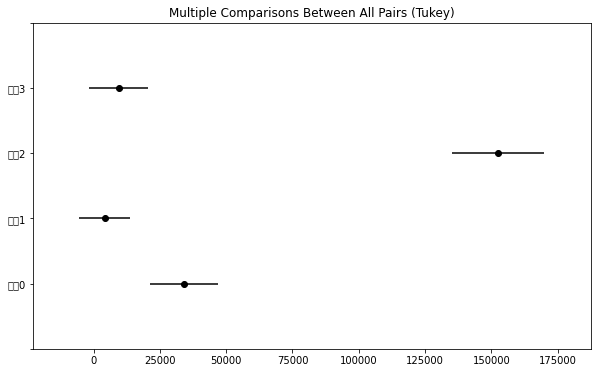

In [ ]:
# view_count

model = ols('view_count ~ C(분류)', df).fit()

print(anova_lm(model))
posthoc = pairwise_tukeyhsd(df['view_count'], df['분류'], alpha=0.05)
print()
print(posthoc)
fig = posthoc.plot_simultaneous()

             df        sum_sq       mean_sq          F        PR(>F)
C(분류)       3.0  6.451620e+18  2.150540e+18  90.991019  3.054515e-45
Residual  414.0  9.784740e+18  2.363464e+16        NaN           NaN

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
group1 group2     meandiff    p-adj       lower          upper      reject
--------------------------------------------------------------------------
   그룹0    그룹1  -59810841.5971 0.0188 -112499635.5596  -7122047.6346   True
   그룹0    그룹2  330657627.5194  0.001  260569053.0573 400746201.9815   True
   그룹0    그룹3  -49800830.3531 0.1063 -106336317.6607   6734656.9545  False
   그룹1    그룹2  390468469.1165  0.001  326977494.7756 453959443.4574   True
   그룹1    그룹3    10010011.244    0.9   -38103987.527   58124010.015  False
   그룹2    그룹3 -380458457.8725  0.001  -447176192.686 -313740723.059   True
--------------------------------------------------------------------------


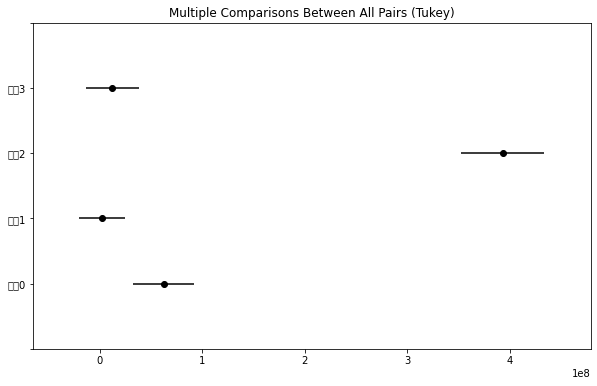

In [ ]:
#총매출

model = ols('총매출 ~ C(분류)', df).fit()

print(anova_lm(model))
posthoc = pairwise_tukeyhsd(df['총매출'], df['분류'], alpha=0.05)
print()
print(posthoc)
fig = posthoc.plot_simultaneous()

             df        sum_sq       mean_sq          F        PR(>F)
C(분류)       3.0  2.834349e+09  9.447830e+08  53.881614  2.019035e-29
Residual  414.0  7.259251e+09  1.753442e+07        NaN           NaN

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   그룹0    그룹1 -1653.3755 0.0165 -3088.4997  -218.2512   True
   그룹0    그룹2  6517.2896  0.001  4608.2344  8426.3447   True
   그룹0    그룹3 -1453.2182 0.0724 -2993.1178    86.6814  False
   그룹1    그룹2   8170.665  0.001  6441.3136  9900.0164   True
   그룹1    그룹3   200.1573    0.9 -1110.3599  1510.6744  False
   그룹2    그룹3 -7970.5078  0.001 -9787.7488 -6153.2667   True
------------------------------------------------------------


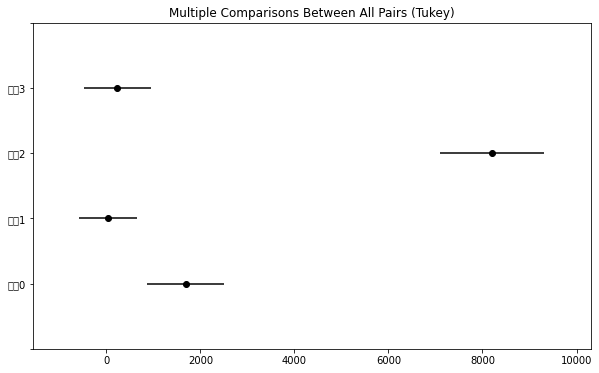

In [ ]:
#리뷰

model = ols('릴리즈전리뷰합 ~ C(분류)', df).fit()

print(anova_lm(model))
posthoc = pairwise_tukeyhsd(df['릴리즈전리뷰합'], df['분류'], alpha=0.05)
print()
print(posthoc)
fig = posthoc.plot_simultaneous()

             df        sum_sq       mean_sq          F        PR(>F)
C(분류)       3.0  2.420511e+14  8.068370e+13  54.257474  1.349855e-29
Residual  414.0  6.156396e+14  1.487052e+12        NaN           NaN

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------
   그룹0    그룹1  -457305.2452 0.0256  -875238.4491   -39372.0413   True
   그룹0    그룹2  1925311.3222  0.001  1369361.1802  2481261.4641   True
   그룹0    그룹3  -415381.4185 0.0808  -863827.0094    33064.1724  False
   그룹1    그룹2  2382616.5673  0.001  1878999.3021  2886233.8326   True
   그룹1    그룹3    41923.8267    0.9  -339721.6077    423569.261  False
   그룹2    그룹3 -2340692.7407  0.001 -2869905.0185 -1811480.4629   True
---------------------------------------------------------------------


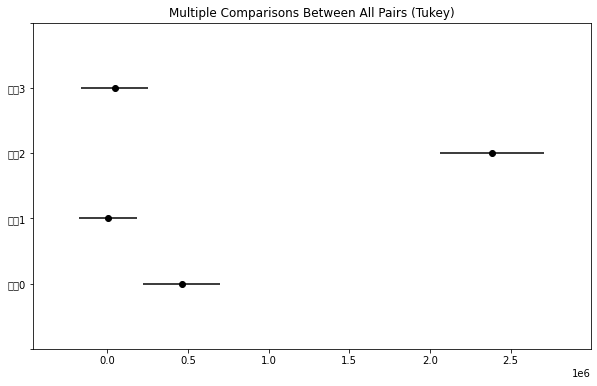

In [ ]:
#박스오피스관객

model = ols('box_aud ~ C(분류)', df).fit()

print(anova_lm(model))
posthoc = pairwise_tukeyhsd(df['box_aud'], df['분류'], alpha=0.05)
print()
print(posthoc)
fig = posthoc.plot_simultaneous()

In [ ]:
df.columns[13:21]

Index(['구간1', '구간2', '구간3_단품', '구간3_프리미어', '구간4_단품', '구간4_프리미어', '구간5_단품',
       '구간5_프리미어'],
      dtype='object')

<구간1 차이 분석>

             df    sum_sq   mean_sq         F    PR(>F)
C(분류)       3.0  0.001515  0.000505  1.007475  0.389307
Residual  414.0  0.207551  0.000501       NaN       NaN

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   그룹0    그룹1  -0.0046 0.4157 -0.0123 0.0031  False
   그룹0    그룹2  -0.0052 0.5544 -0.0154 0.0051  False
   그룹0    그룹3  -0.0046 0.4684 -0.0129 0.0036  False
   그룹1    그룹2  -0.0006    0.9 -0.0098 0.0087  False
   그룹1    그룹3  -0.0001    0.9 -0.0071  0.007  False
   그룹2    그룹3   0.0005    0.9 -0.0092 0.0102  False
---------------------------------------------------
-----------------------------------------------------------------------
<구간2 차이 분석>

             df    sum_sq   mean_sq           F         PR(>F)
C(분류)       3.0  8.371885  2.790628  874.406555  1.061857e-178
Residual  414.0  1.321262  0.003191         NaN            NaN

Multiple Comparison of 

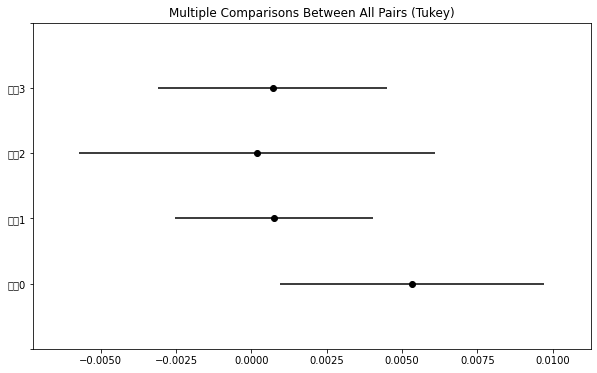

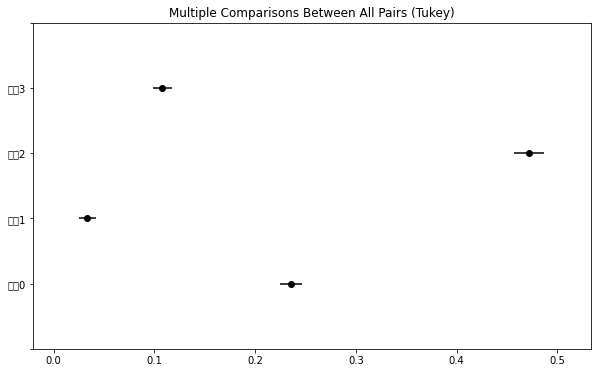

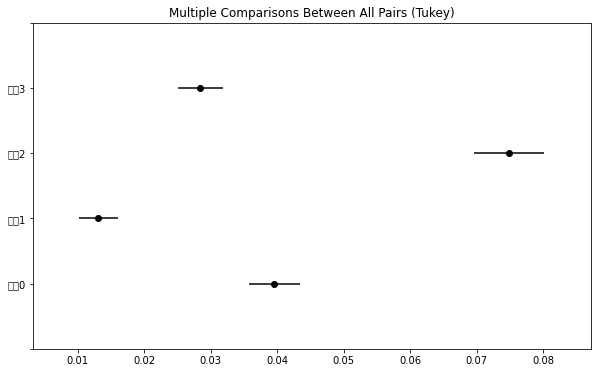

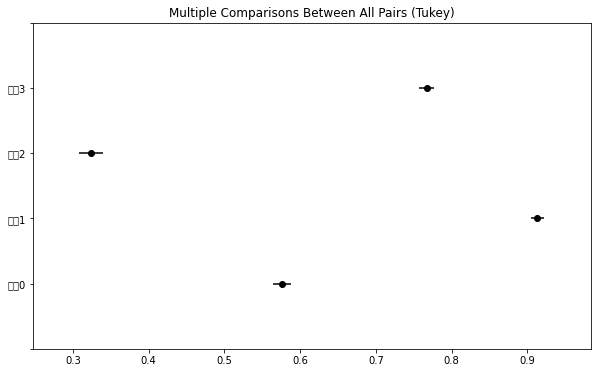

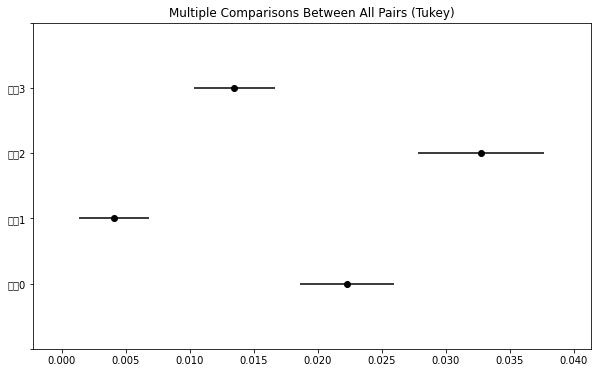

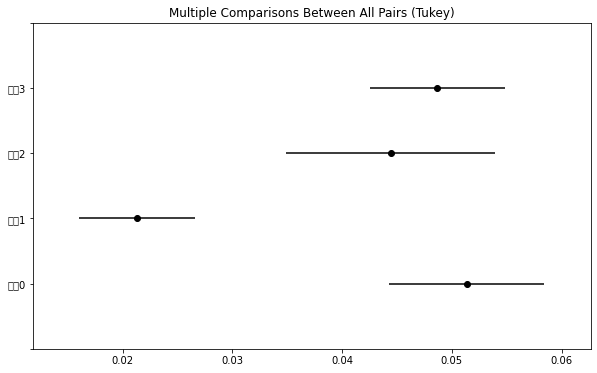

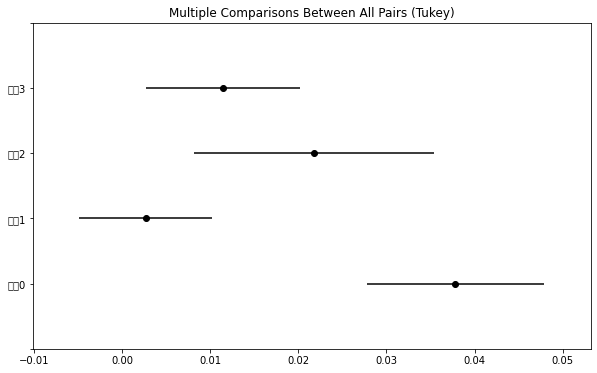

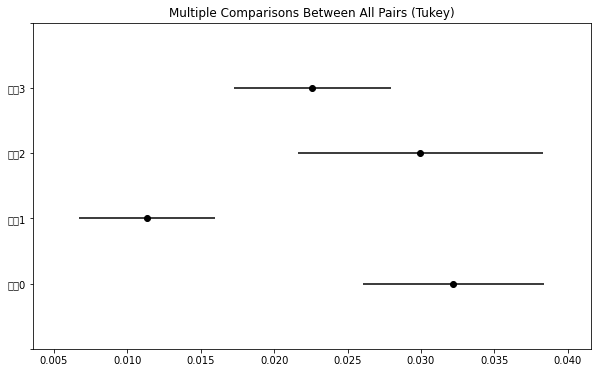

In [ ]:
# 구간별

for col in df.columns[13:21]:
  print(f'<{col} 차이 분석>')
  print()
  model = ols(f'{col} ~ C(분류)', df).fit()
  print(anova_lm(model))
  print()
  posthoc = pairwise_tukeyhsd(df[col], df['분류'], alpha=0.05)
  print(posthoc)
  fig = posthoc.plot_simultaneous()
  print('-----------------------------------------------------------------------')

             df     sum_sq   mean_sq            F         PR(>F)
C(분류)       3.0  13.580657  4.526886  1103.287249  5.118826e-197
Residual  414.0   1.698679  0.004103          NaN            NaN

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   그룹0    그룹1  -0.2862 0.001 -0.3081 -0.2642   True
   그룹0    그룹2   0.2613 0.001  0.2321  0.2905   True
   그룹0    그룹3  -0.1785 0.001  -0.202 -0.1549   True
   그룹1    그룹2   0.5475 0.001   0.521  0.5739   True
   그룹1    그룹3   0.1077 0.001  0.0877  0.1278   True
   그룹2    그룹3  -0.4398 0.001 -0.4676  -0.412   True
---------------------------------------------------


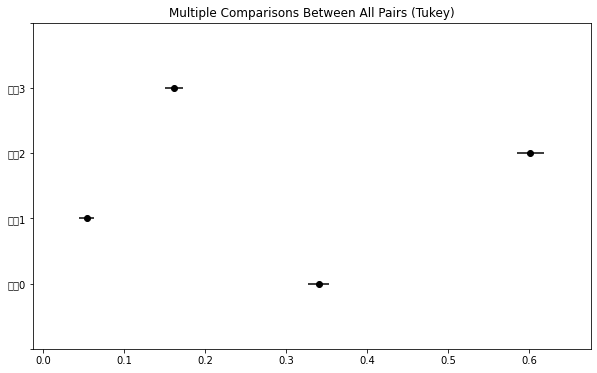

In [ ]:
# 단품/프리미어 비율

model = ols('단품비율 ~ C(분류)', df).fit()

print(anova_lm(model))
posthoc = pairwise_tukeyhsd(df['단품비율'], df['분류'], alpha=0.05)
print()
print(posthoc)
fig = posthoc.plot_simultaneous()

             df     sum_sq   mean_sq            F         PR(>F)
C(분류)       3.0  13.580657  4.526886  1103.287249  5.118826e-197
Residual  414.0   1.698679  0.004103          NaN            NaN

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   그룹0    그룹1   0.2862 0.001  0.2642  0.3081   True
   그룹0    그룹2  -0.2613 0.001 -0.2905 -0.2321   True
   그룹0    그룹3   0.1785 0.001  0.1549   0.202   True
   그룹1    그룹2  -0.5475 0.001 -0.5739  -0.521   True
   그룹1    그룹3  -0.1077 0.001 -0.1278 -0.0877   True
   그룹2    그룹3   0.4398 0.001   0.412  0.4676   True
---------------------------------------------------


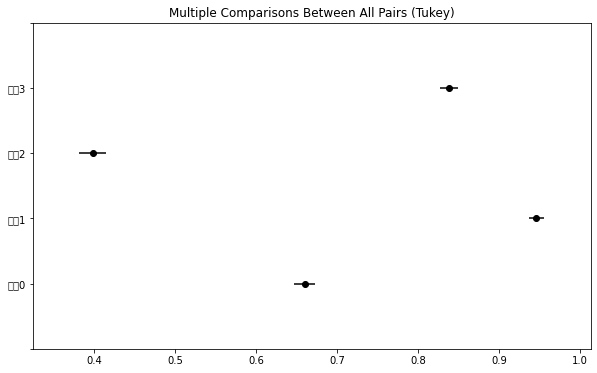

In [ ]:
model = ols('프리미어비율 ~ C(분류)', df).fit()

print(anova_lm(model))
posthoc = pairwise_tukeyhsd(df['프리미어비율'], df['분류'], alpha=0.05)
print()
print(posthoc)
fig = posthoc.plot_simultaneous()

In [ ]:
# 카이제곱 등급
from scipy.stats import chi2_contingency

obs = np.array([[16,5,4,5],[25,37,12,25],[30,80,29,54],[13,29,6,23]])
chi2_contingency(obs) #chi2, p, df, expect

(26.617846901987658,
 0.0016174430980426054,
 9,
 array([[ 6.41221374, 11.52671756,  3.89312977,  8.16793893],
        [21.16030534, 38.03816794, 12.84732824, 26.95419847],
        [41.2519084 , 74.15521628, 25.04580153, 52.54707379],
        [15.17557252, 27.27989822,  9.21374046, 19.3307888 ]]))

In [ ]:
test = df[~(df['grade'] == '없음')]
test

contingency = pd.crosstab(test['grade'], test['분류'])
chi2_contingency(contingency)

(26.61784690198766,
 0.0016174430980426017,
 9,
 array([[21.16030534, 38.03816794, 12.84732824, 26.95419847],
        [41.2519084 , 74.15521628, 25.04580153, 52.54707379],
        [ 6.41221374, 11.52671756,  3.89312977,  8.16793893],
        [15.17557252, 27.27989822,  9.21374046, 19.3307888 ]]))

In [ ]:
genre_list = []
for i in range(len(df)):
  tmp = eval(df.loc[i,'genres'])
  genre_list += tmp

genre_list = list(set(genre_list))

genre_list.remove('')
genre_list

['다큐멘터리',
 '코미디',
 '드라마',
 '전쟁',
 '액션',
 '스릴러',
 '기타',
 '사극',
 '어드벤처',
 'SF',
 '가족',
 '판타지',
 '공포(호러)',
 '범죄',
 '뮤지컬',
 '미스터리',
 '멜로/로맨스',
 '애니메이션']

In [ ]:
gruop_list = ['group0','group1','group2','group3']
group0_genre_list = []
group1_genre_list = []
group2_genre_list = []
group3_genre_list = []

In [ ]:
eval('group0_genre_list')

[]

In [ ]:
tmp = df[df['분류'] == '그룹0']
for j in range(len(tmp)):
    group0_genre_list += eval(tmp.iloc[j,3]) 
  
tmp = df[df['분류'] == '그룹1']
for j in range(len(tmp)):
    group1_genre_list += eval(tmp.iloc[j,3]) 

tmp = df[df['분류'] == '그룹2']
for j in range(len(tmp)):
    group2_genre_list += eval(tmp.iloc[j,3])

tmp = df[df['분류'] == '그룹3']
for j in range(len(tmp)):
    group3_genre_list += eval(tmp.iloc[j,3])  

In [ ]:
list2 = [group0_genre_list,group1_genre_list,group2_genre_list,group3_genre_list]

In [ ]:
group0_dict = {}
group1_dict = {}
group2_dict = {}
group3_dict = {}

for genre in genre_list:
  count = group0_genre_list.count(genre)
  group0_dict[genre] = count
for genre in genre_list:
  count = group1_genre_list.count(genre)
  group1_dict[genre] = count
for genre in genre_list:
  count = group2_genre_list.count(genre)
  group2_dict[genre] = count
for genre in genre_list:
  count = group3_genre_list.count(genre)
  group3_dict[genre] = count

In [ ]:
list3 = [group0_dict,group1_dict,group2_dict,group3_dict]
genre_df_dict = {}
for genre in genre_list:
  genre_df_dict[genre] = []
  for k in range(0,4):
    genre_df_dict[genre].append(list3[k][genre])

In [ ]:
genre_df = pd.DataFrame(genre_df_dict)

In [ ]:
genre_df.to_csv('/content/gdrive/My Drive/skb/논문용그룹별장르개수.csv')

In [ ]:
point = pd.read_excel('/content/gdrive/My Drive/skb/논문용데이터평점추가.xlsx',index_col =0)
net_point = point[~(point['naver네티즌평점']==-1)]
ex_point = point[~(point['naver전문가평점']==-1)]

             df      sum_sq   mean_sq         F    PR(>F)
C(분류)       3.0    2.270274  0.756758  0.625684  0.599172
Residual  204.0  246.735634  1.209488       NaN       NaN

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   그룹0    그룹1  -0.0102    0.9 -0.5856 0.5652  False
   그룹0    그룹2   0.0489    0.9 -0.5018 0.5997  False
   그룹0    그룹3  -0.2163 0.6726  -0.729 0.2965  False
   그룹1    그룹2   0.0592    0.9 -0.5641 0.6824  False
   그룹1    그룹3  -0.2061 0.7778  -0.796 0.3839  False
   그룹2    그룹3  -0.2652 0.6047 -0.8312 0.3007  False
---------------------------------------------------


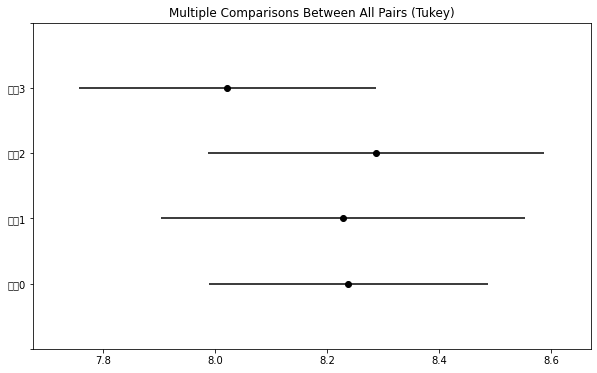

In [ ]:
model = ols('naver네티즌평점 ~ C(분류)', net_point).fit()

print(anova_lm(model))
posthoc = pairwise_tukeyhsd(net_point['naver네티즌평점'], net_point['분류'], alpha=0.05)
print()
print(posthoc)
fig = posthoc.plot_simultaneous()

             df      sum_sq   mean_sq         F    PR(>F)
C(분류)       3.0   13.235822  4.411941  3.371938  0.019462
Residual  204.0  266.919465  1.308429       NaN       NaN

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   그룹0    그룹1  -0.6446 0.0292 -1.2431 -0.0461   True
   그룹0    그룹2   0.0615    0.9 -0.5113  0.6343  False
   그룹0    그룹3  -0.0803    0.9 -0.6136   0.453  False
   그룹1    그룹2   0.7061 0.0268  0.0578  1.3544   True
   그룹1    그룹3   0.5643 0.0839 -0.0493  1.1779  False
   그룹2    그룹3  -0.1418    0.9 -0.7305  0.4468  False
----------------------------------------------------


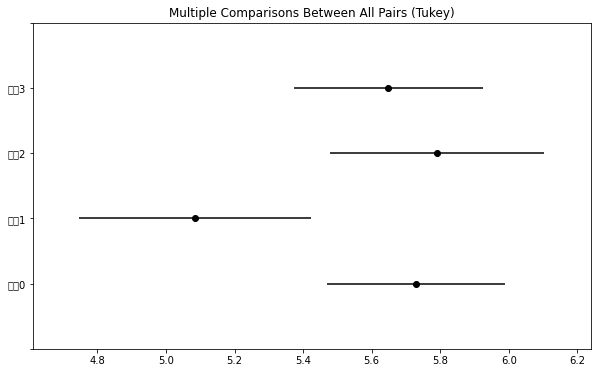

In [ ]:
model = ols('naver전문가평점 ~ C(분류)', ex_point).fit()

print(anova_lm(model))
posthoc = pairwise_tukeyhsd(ex_point['naver전문가평점'], ex_point['분류'], alpha=0.05)
print()
print(posthoc)
fig = posthoc.plot_simultaneous()

In [ ]:
for group in ['그룹0','그룹1','그룹2','그룹3']:
  tmp = net_point[net_point['분류'] == group]
  result = stats.ttest_rel(tmp['naver네티즌평점'], tmp['naver전문가평점'])
  print(f'{group}')
  print('t statistic : %.3f \np-value : %.3f' % (result))
  print()

그룹0
t statistic : 15.785 
p-value : 0.000

그룹1
t statistic : 14.309 
p-value : 0.000

그룹2
t statistic : 14.437 
p-value : 0.000

그룹3
t statistic : 14.392 
p-value : 0.000



In [ ]:
net_point[net_point['분류'] == '그룹1']

,상품ID,개봉일,nations,genres,grade,director,actors,VOD개시일,관객수,릴리즈전리뷰합,릴리즈후리뷰합,view_count,총매출,구간1,구간2,구간3-단품,구간3-프리미어,구간4-단품,구간4-프리미어,구간5-단품,구간5-프리미어,전체평균,분류,단품비율,프리미어비율,타이틀명,kobis_code,naver_id,naver전문가평점,naver네티즌평점
88,P002624,2018-01-25,['중국'],"['액션', '범죄']",15,['오우삼'],"['장한위', '후쿠야마 마사하루', '하지원', '치웨이']",2018-02-06,"3,738",16,18,10222,10604300,2.191956e-11,0.066528,0.006855,0.907984,0.001902,0.012083,0.000594,0.004053,250.067252,그룹1,0.075879,0.924121,맨헌트(2018),20177351,166463,3.67,8.17
142,P000031,2017-09-14,['한국'],['코미디'],15,['송창용'],"['최성국', '김성경', '이준혁', '송삼동', '정이연', '한보민', '안창...",2017-09-20,6151,50,279,12760,6266013,9.171626e-12,0.056468,0.008045,0.912465,0.002868,0.012496,0.002166,0.005492,268.215125,그룹1,0.069547,0.930453,구세주: 리턴즈,20173826,162751,2.00,4.80
143,P000035,2017-09-14,['한국'],"['미스터리', '스릴러']",청불,['김광복'],"['박지수', '이빛나', '장소연', '윤근', '최나영', '최수복', '이은지...",2017-09-20,519,6,98,2884,1260805,1.620448e-09,0.045872,0.008299,0.915823,0.001733,0.014209,0.001492,0.012572,63.417235,그룹1,0.057396,0.942604,사월의 끝,20163842,142633,5.50,7.00
147,P000064,2018-04-25,['한국'],['스릴러'],15,['김진묵'],"['지현우', '오만석', '이나라', '김학철', '조은지', '김정수', '이지...",2018-05-16,49682,365,315,8005,11837711,1.207831e-10,0.054866,0.019237,0.891833,0.006748,0.017833,0.003714,0.005769,170.996210,그룹1,0.084565,0.915435,살인소설(2018),20167007,157974,5.00,7.27
148,P000071,2018-05-10,['미국'],['드라마'],12,['구스 반 산트'],"['매튜 매커너히', '나오미 왓츠']",2018-05-17,7087,32,23,1717,831589,2.352557e-08,0.035404,0.025289,0.904401,0.005141,0.014729,0.004784,0.010252,39.543468,그룹1,0.070618,0.929382,씨 오브 트리스,20159102,125433,5.25,7.00
151,P000201,2017-11-09,['미국'],"['멜로/로맨스', '드라마']",15,['프레드 쉐피시'],"['줄리엣 비노쉬', '클라이브 오웬']",2017-11-15,3766,9,36,2079,976797,7.459480e-09,0.043227,0.012745,0.923491,0.003399,0.007859,0.002456,0.006822,50.893844,그룹1,0.061827,0.938173,러브 앤 아트,20162565,106052,6.00,8.45
180,P000604,2018-04-19,['미국'],"['범죄', '액션']",15,['크리스찬 구드가스트'],"['제라드 버틀러', '파블로 쉬레이버']",2018-04-25,28477,190,275,24594,28572513,3.327550e-12,0.081412,0.017998,0.844897,0.005011,0.022993,0.004598,0.023092,419.639969,그룹1,0.109019,0.890981,크리미널 스쿼드,20182701,168036,5.33,6.73
185,P000626,2017-12-07,['캐나다'],"['드라마', '멜로/로맨스']",15,['카일 라이드아웃'],"['마이클 에크런드', '사라 캐닝', '찰리 캐릭', '조디 발포어', '조쉬 엡...",2017-12-21,1639,19,10,760,466321,6.067140e-07,0.037310,0.010302,0.933048,0.003255,0.007990,0.002208,0.005887,18.364691,그룹1,0.053075,0.946925,에드워드,20167885,136453,5.00,8.11
198,P000787,2017-12-14,['한국'],['코미디'],12,['임대형'],"['기주봉', '오정환', '고원희', '전여빈', '유재명', '전순옥', '전재...",2017-12-28,4063,46,26,140,74020,6.999111e-04,0.005424,0.008287,0.961289,0.003225,0.012901,0.004087,0.004087,3.351979,그룹1,0.021723,0.978277,메리 크리스마스 미스터 모,20160465,149289,7.33,8.94
202,P000846,2018-01-31,['한국'],['드라마'],15,"['노홍식', '필동']","['주가을', '예슬비', '민준호', '송보배', '윤은지', '위명우', '조현...",2018-02-01,104,4,62,1386,376787,6.511160e-07,0.073716,0.010286,0.898306,0.001913,0.005419,0.002391,0.007969,16.956988,그룹1,0.088306,0.911694,종이비행기,20168766,149629,3.00,9.50
